<a href="https://www.kaggle.com/code/laxmivatsalyadaita/diabetes?scriptVersionId=139976896" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**If you like my notebook, please don't forget to UPVOTE! You can also make a copy of my notebook and edit to run your additional analysis.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-factors/diabetes-vid.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing Data

In [3]:
raw_data = pd.read_csv('/kaggle/input/diabetes-factors/diabetes-vid.csv')
raw_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,dead
1,1,85,66,29,0,26.6,0.351,31,alive
2,8,183,64,0,0,23.3,0.672,32,dead
3,1,89,66,23,94,28.1,0.167,21,alive
4,0,137,40,35,168,43.1,2.288,33,dead


In [4]:
raw_data.shape

(768, 9)

# Data Preprocessing

In [5]:
data = raw_data.copy()

In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No missing values

<Axes: xlabel='Pregnancies'>

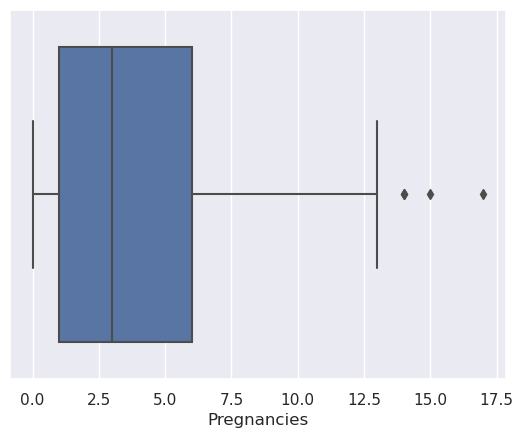

In [7]:
sns.boxplot(x=data['Pregnancies'])

In [8]:
data = data[data['Pregnancies']<=13]

<Axes: xlabel='Pregnancies'>

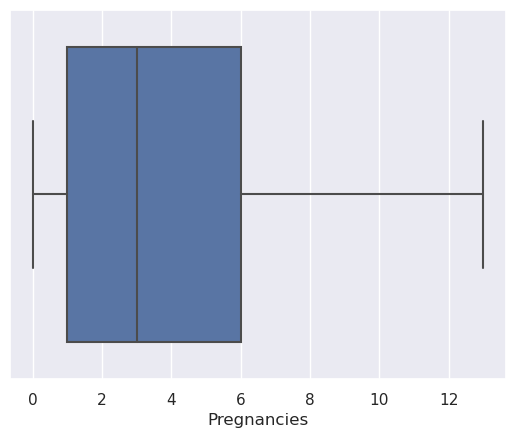

In [9]:
sns.boxplot(x=data['Pregnancies'])

<Axes: xlabel='Glucose'>

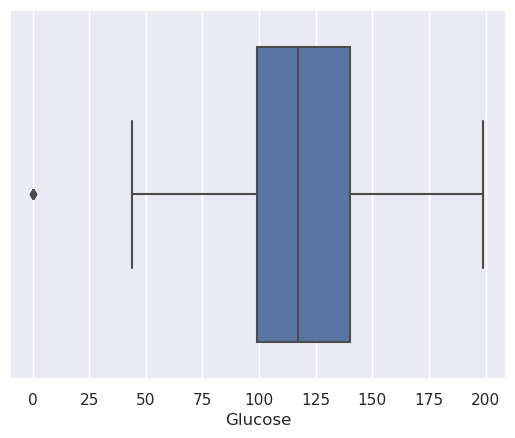

In [10]:
sns.boxplot(x=data['Glucose'])

In [11]:
data = data[data['Glucose']>25]

<Axes: xlabel='Glucose'>

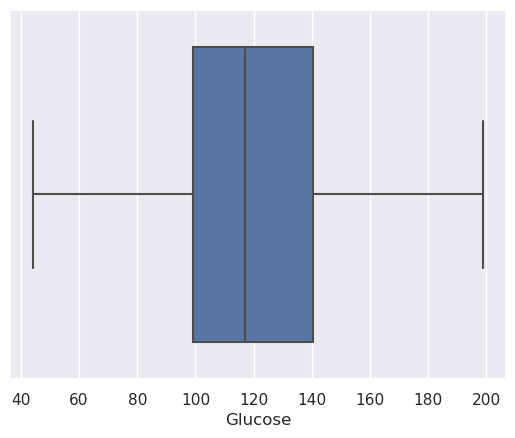

In [12]:
sns.boxplot(x=data['Glucose'])

<Axes: xlabel='BloodPressure'>

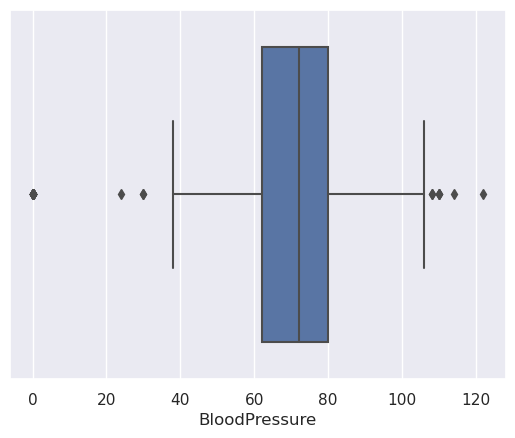

In [13]:
sns.boxplot(x=data['BloodPressure'])

In [14]:
data = data[data['BloodPressure']>39]
data = data[data['BloodPressure']<=105]

<Axes: xlabel='BloodPressure'>

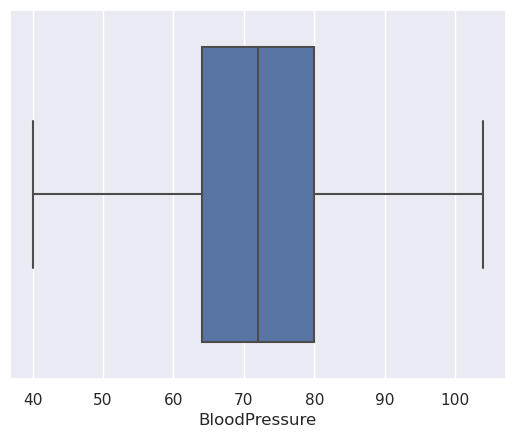

In [15]:
sns.boxplot(x=data['BloodPressure'])

<Axes: xlabel='SkinThickness'>

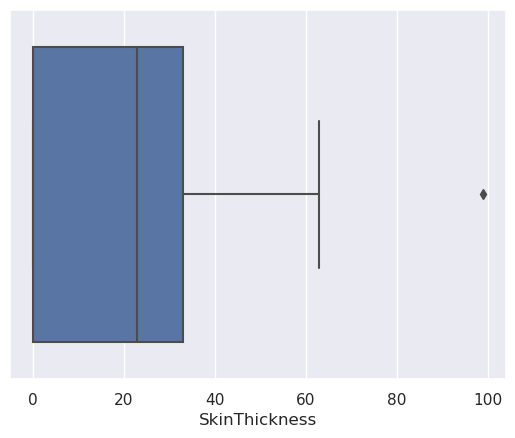

In [16]:
sns.boxplot(x=data['SkinThickness'])

In [17]:
data = data[data['SkinThickness']<=80]

<Axes: xlabel='SkinThickness'>

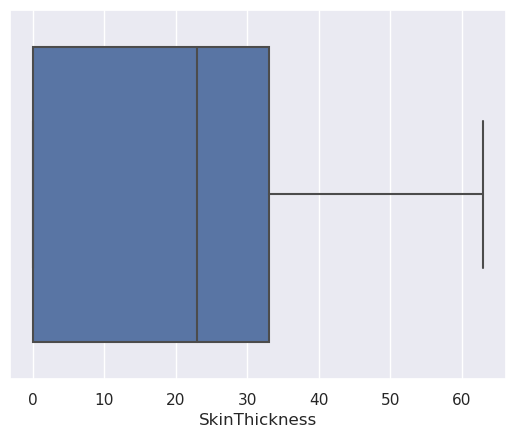

In [18]:
sns.boxplot(x=data['SkinThickness'])

<Axes: xlabel='Insulin'>

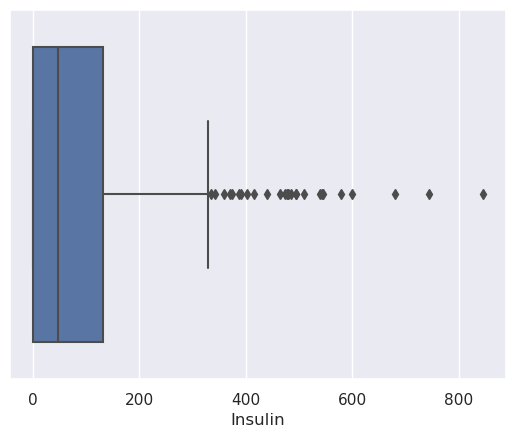

In [19]:
sns.boxplot(x=data['Insulin'])

In [20]:
data = data[data['Insulin']<=300]

<Axes: xlabel='Insulin'>

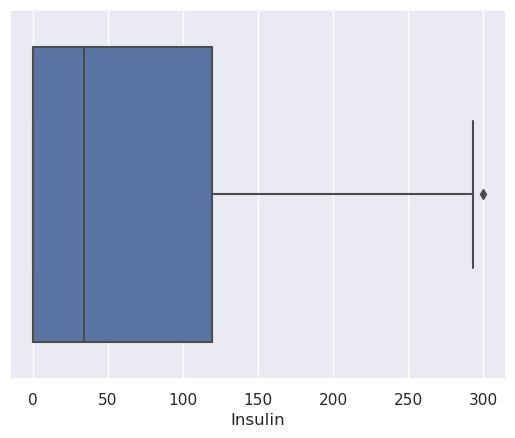

In [21]:
sns.boxplot(x=data['Insulin'])

<Axes: xlabel='BMI'>

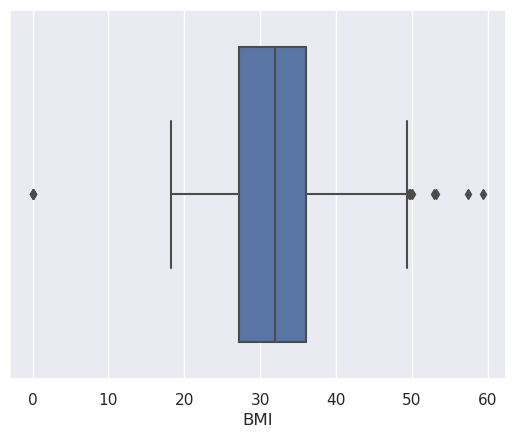

In [22]:
sns.boxplot(x=data['BMI'])

In [23]:
data = data[data['BMI']>10]
data = data[data['BMI']<=48]

<Axes: xlabel='BMI'>

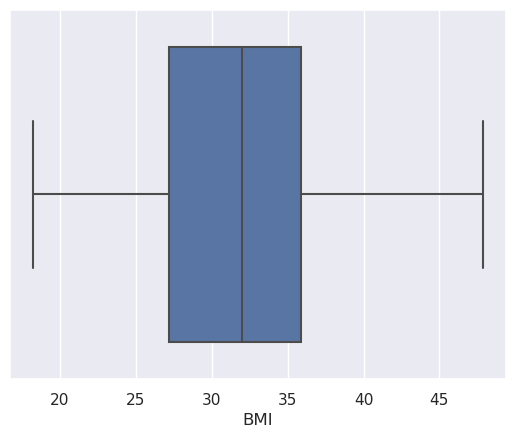

In [24]:
sns.boxplot(x=data['BMI'])

<Axes: xlabel='DiabetesPedigreeFunction'>

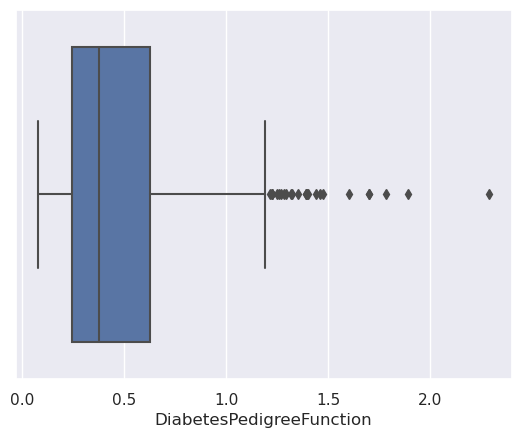

In [25]:
sns.boxplot(x=data['DiabetesPedigreeFunction'])

In [26]:
data = data[data['DiabetesPedigreeFunction']<=1.2]

<Axes: xlabel='DiabetesPedigreeFunction'>

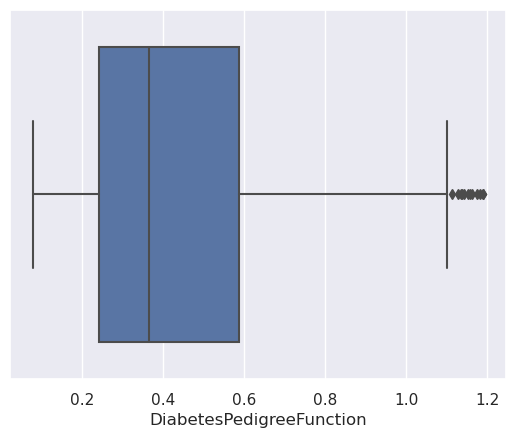

In [27]:
sns.boxplot(x=data['DiabetesPedigreeFunction'])

<Axes: xlabel='Age'>

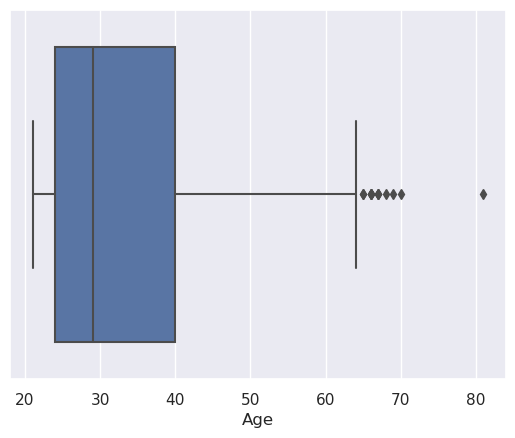

In [28]:
sns.boxplot(x=data['Age'])

In [29]:
data = data[data['Age']<=64]

<Axes: xlabel='Age'>

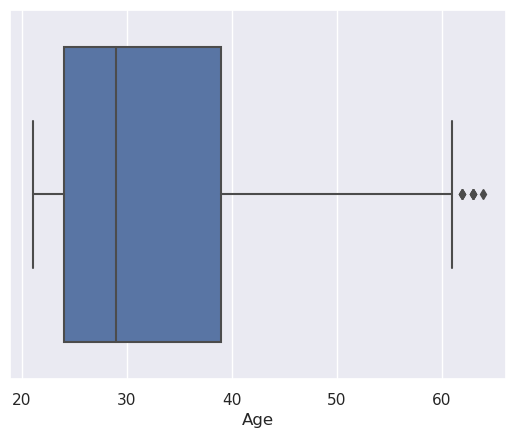

In [30]:
sns.boxplot(x=data['Age'])

In [31]:
data.shape

(621, 9)

# Feature Scaling

In [32]:
inputs = data.iloc[:,:-1]

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [34]:
scaled_inputs = scaler.transform(inputs)

In [35]:
target = data['Outcome']

# Splitting the Dataset

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, target, test_size = 0.2, random_state=20)

# Classification Models

In [38]:
reg = LogisticRegression()

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [40]:
reg.fit(x_train, y_train)

LogisticRegression()

In [41]:
reg_pred = reg.predict(x_test)

In [42]:
confusion_matrix(y_test, reg_pred)

array([[69,  9],
       [22, 25]])

In [43]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, reg_pred, target_names=['alive', 'dead']))


Classification Report

              precision    recall  f1-score   support

       alive       0.76      0.88      0.82        78
        dead       0.74      0.53      0.62        47

    accuracy                           0.75       125
   macro avg       0.75      0.71      0.72       125
weighted avg       0.75      0.75      0.74       125



In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
gnb = GaussianNB()

In [46]:
gnb.fit(x_train, y_train)

GaussianNB()

In [47]:
gnb_pred = gnb.predict(x_test)
confusion_matrix(y_test, gnb_pred)

array([[64, 14],
       [17, 30]])

In [48]:
print('\nClassification Report\n')
print(classification_report(y_test, gnb_pred, target_names=['alive', 'dead']))


Classification Report

              precision    recall  f1-score   support

       alive       0.79      0.82      0.81        78
        dead       0.68      0.64      0.66        47

    accuracy                           0.75       125
   macro avg       0.74      0.73      0.73       125
weighted avg       0.75      0.75      0.75       125



In [49]:
from sklearn.svm import SVC

svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
svm.fit(x_train, y_train)


SVC(gamma=0.5)

In [50]:
svm_pred = svm.predict(x_test)
confusion_matrix(y_test, svm_pred)

array([[68, 10],
       [28, 19]])

In [51]:
print('\nClassification Report\n')
print(classification_report(y_test, svm_pred, target_names=['alive', 'dead']))


Classification Report

              precision    recall  f1-score   support

       alive       0.71      0.87      0.78        78
        dead       0.66      0.40      0.50        47

    accuracy                           0.70       125
   macro avg       0.68      0.64      0.64       125
weighted avg       0.69      0.70      0.68       125



In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestClassifier()

In [53]:
rf_pred = rf.predict(x_test)
confusion_matrix(y_test, rf_pred)

array([[69,  9],
       [22, 25]])

In [54]:
print('\nClassification Report\n')
print(classification_report(y_test, rf_pred, target_names=['Alive', 'Dead']))


Classification Report

              precision    recall  f1-score   support

       Alive       0.76      0.88      0.82        78
        Dead       0.74      0.53      0.62        47

    accuracy                           0.75       125
   macro avg       0.75      0.71      0.72       125
weighted avg       0.75      0.75      0.74       125



In [55]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,26)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores[k] = accuracy_score(y_test,y_pred)
    scores_list.append(accuracy_score(y_test,y_pred))


Text(0, 0.5, 'Testing accuracy')

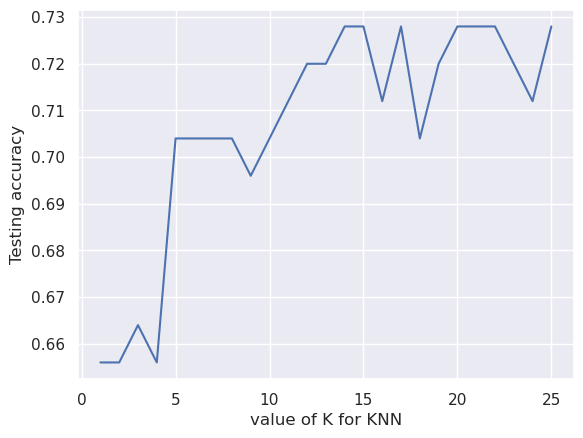

In [56]:
plt.plot(k_range, scores_list)
plt.xlabel('value of K for KNN')
plt.ylabel('Testing accuracy')

In [57]:
knn = KNeighborsClassifier(n_neighbors = 21)

In [58]:
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
confusion_matrix(y_test, knn_pred)

array([[72,  6],
       [28, 19]])

In [59]:
print('\nClassification Report\n')
print(classification_report(y_test, knn_pred, target_names=['Alive', 'Dead']))


Classification Report

              precision    recall  f1-score   support

       Alive       0.72      0.92      0.81        78
        Dead       0.76      0.40      0.53        47

    accuracy                           0.73       125
   macro avg       0.74      0.66      0.67       125
weighted avg       0.74      0.73      0.70       125



# Inference

Naive Bayes classifer with 75% accuracy is the best compared to other models.